In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of rows
n = 500

# Generate synthetic features
party_level = np.random.randint(1, 20, n)  # avg party level between 1-20
party_size = np.random.randint(3, 7, n)    # party size between 3-6
party_ac = np.random.randint(10, 20, n)    # avg armor class
party_hp = np.random.randint(20, 150, n)   # avg hit points
party_attack_bonus = np.random.randint(2, 12, n)  # attack modifier
spellcasters = np.random.randint(0, party_size+1) # number of spellcasters

monster_cr = np.random.randint(1, 25, n)   # monster challenge rating
monster_hp = np.random.randint(15, 200, n)
monster_ac = np.random.randint(8, 22, n)
monster_attack_bonus = np.random.randint(1, 12, n)
num_monsters = np.random.randint(1, 5, n)

# Simple rule to generate outcomes (not perfect, but gives structure)
# Party strength vs monster strength
party_strength = party_level * party_size + party_hp/10 + party_attack_bonus*2 + spellcasters*1.5
monster_strength = monster_cr * num_monsters + monster_hp/15 + monster_attack_bonus*2

outcome = (party_strength > monster_strength).astype(int)  # 1=Win, 0=Lose

# Create dataframe
df = pd.DataFrame({
    "party_level": party_level,
    "party_size": party_size,
    "party_ac": party_ac,
    "party_hp": party_hp,
    "party_attack_bonus": party_attack_bonus,
    "spellcasters": spellcasters,
    "monster_cr": monster_cr,
    "monster_hp": monster_hp,
    "monster_ac": monster_ac,
    "monster_attack_bonus": monster_attack_bonus,
    "num_monsters": num_monsters,
    "outcome": outcome
})


In [ ]:
df.head()

,party_level,party_size,party_ac,party_hp,party_attack_bonus,spellcasters,monster_cr,monster_hp,monster_ac,monster_attack_bonus,num_monsters,outcome
0,7,4,13,143,8,3,9,161,9,7,2,1
1,15,6,12,58,7,3,9,67,21,1,3,1
2,11,5,10,82,7,5,4,33,21,7,2,1
3,8,5,15,65,6,1,3,71,12,3,4,1
4,7,3,11,107,7,1,17,39,16,9,4,0


In [ ]:
df.shape

(500, 12)

In [ ]:
df_messy = df.copy()

# 1. Insert some missing values randomly
for col in df_messy.columns[:-1]:  # exclude outcome
    df_messy.loc[df_messy.sample(frac=0.05, random_state=np.random.randint(0,1000)).index, col] = np.nan

# 2. Add some random noise/outliers
df_messy.loc[df_messy.sample(frac=0.02, random_state=42).index, "party_hp"] *= 10
df_messy.loc[df_messy.sample(frac=0.02, random_state=24).index, "monster_hp"] *= 8

# 3. Add a useless column (like player names)
names = ["Aria", "Borin", "Celeste", "Draven", "Elric", "Fiora", "Galen"]
df_messy["party_leader"] = np.random.choice(names, len(df_messy))

# 4. Shuffle column order a bit
cols = list(df_messy.columns)
np.random.shuffle(cols)
df_messy = df_messy[cols]

In [ ]:
df_messy.head()

,party_level,spellcasters,party_hp,num_monsters,party_attack_bonus,monster_attack_bonus,monster_hp,party_ac,monster_cr,monster_ac,outcome,party_size,party_leader
0,7.0,3.0,143.0,2.0,8.0,7.0,161.0,13.0,9.0,9.0,1,4.0,Aria
1,15.0,3.0,NaN,3.0,7.0,1.0,67.0,12.0,9.0,21.0,1,6.0,Draven
2,11.0,5.0,82.0,2.0,7.0,7.0,33.0,10.0,4.0,21.0,1,5.0,Celeste
3,8.0,1.0,65.0,4.0,6.0,3.0,568.0,15.0,3.0,12.0,1,5.0,Fiora
4,NaN,1.0,107.0,4.0,7.0,9.0,39.0,11.0,17.0,16.0,0,3.0,Fiora


In [ ]:
df_messy.shape

(500, 13)

In [ ]:
df_messy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   party_level           475 non-null    float64
 1   spellcasters          475 non-null    float64
 2   party_hp              475 non-null    float64
 3   num_monsters          475 non-null    float64
 4   party_attack_bonus    475 non-null    float64
 5   monster_attack_bonus  475 non-null    float64
 6   monster_hp            475 non-null    float64
 7   party_ac              475 non-null    float64
 8   monster_cr            475 non-null    float64
 9   monster_ac            475 non-null    float64
 10  outcome               500 non-null    int64  
 11  party_size            475 non-null    float64
 12  party_leader          500 non-null    object 
dtypes: float64(11), int64(1), object(1)
memory usage: 50.9+ KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

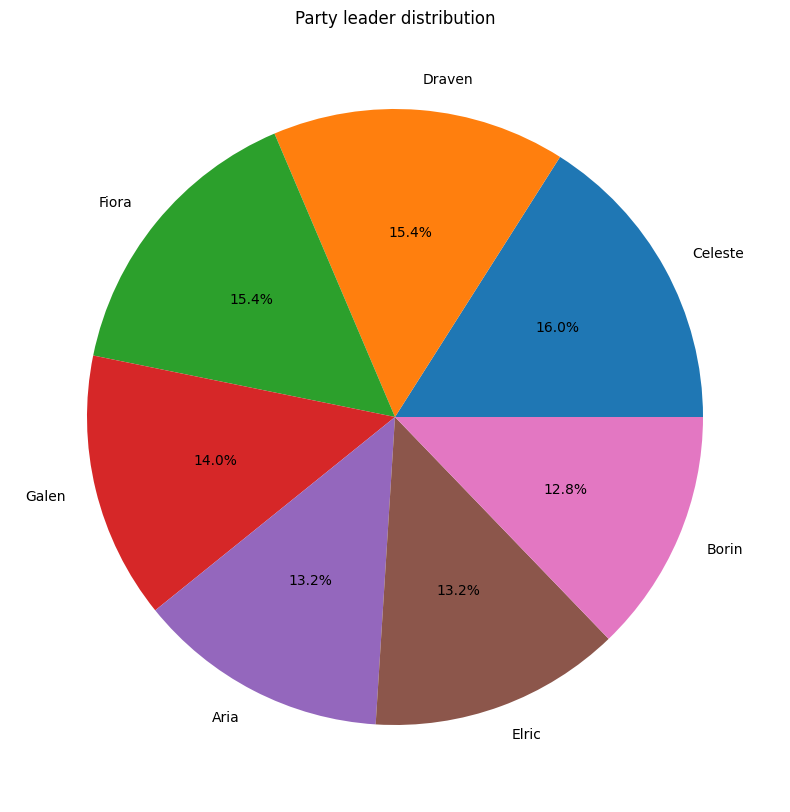

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(df_messy['party_leader'].value_counts(), labels = df_messy['party_leader'].value_counts().index, autopct='%1.1f%%')
plt.title('Party leader distribution')
plt.show()

<Axes: xlabel='party_hp', ylabel='count'>

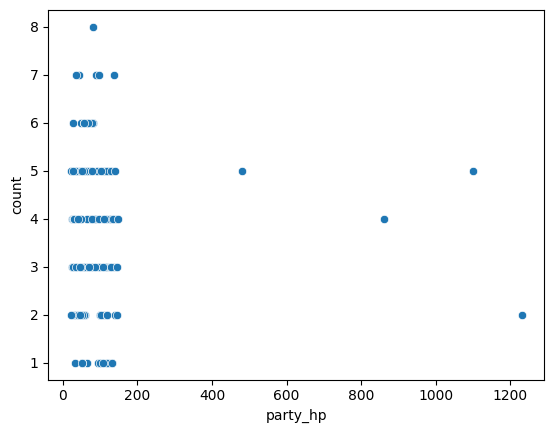

In [ ]:
sns.scatterplot(x = df_messy['party_hp'], y = df_messy['party_hp'].value_counts())

<Axes: xlabel='num_monsters', ylabel='Count'>

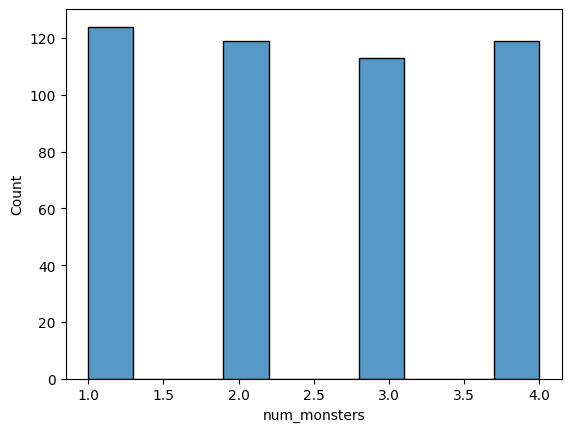

In [ ]:
sns.histplot(df_messy['num_monsters'], bins = 10)

<Axes: xlabel='monster_hp', ylabel='count'>

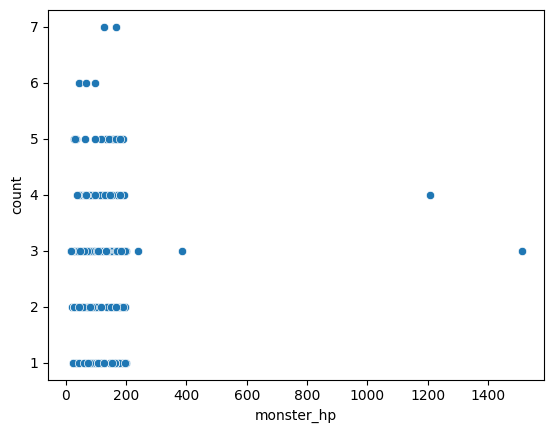

In [ ]:
sns.scatterplot(x = df_messy['monster_hp'], y = df_messy['monster_hp'].value_counts())

<Axes: xlabel='party_attack_bonus', ylabel='Count'>

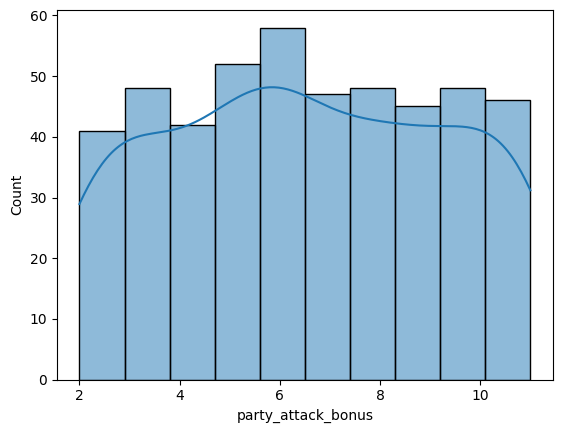

In [ ]:
sns.histplot(df_messy['party_attack_bonus'], kde=True)

In [ ]:
df_messy.head()

,party_level,spellcasters,party_hp,num_monsters,party_attack_bonus,monster_attack_bonus,monster_hp,party_ac,monster_cr,monster_ac,outcome,party_size,party_leader
0,7.0,3.0,143.0,2.0,8.0,7.0,161.0,13.0,9.0,9.0,1,4.0,Aria
1,15.0,3.0,NaN,3.0,7.0,1.0,67.0,12.0,9.0,21.0,1,6.0,Draven
2,11.0,5.0,82.0,2.0,7.0,7.0,33.0,10.0,4.0,21.0,1,5.0,Celeste
3,8.0,1.0,65.0,4.0,6.0,3.0,568.0,15.0,3.0,12.0,1,5.0,Fiora
4,NaN,1.0,107.0,4.0,7.0,9.0,39.0,11.0,17.0,16.0,0,3.0,Fiora


In [ ]:
df_messy.drop('party_leader', axis = 1, inplace = True)

In [ ]:
df_messy.fillna(df_messy.mean(), inplace = True)

In [ ]:
df_messy.isnull().sum()

,0
party_level,0
spellcasters,0
party_hp,0
num_monsters,0
party_attack_bonus,0
monster_attack_bonus,0
monster_hp,0
party_ac,0
monster_cr,0
monster_ac,0


In [ ]:
df_messy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   party_level           500 non-null    float64
 1   spellcasters          500 non-null    float64
 2   party_hp              500 non-null    float64
 3   num_monsters          500 non-null    float64
 4   party_attack_bonus    500 non-null    float64
 5   monster_attack_bonus  500 non-null    float64
 6   monster_hp            500 non-null    float64
 7   party_ac              500 non-null    float64
 8   monster_cr            500 non-null    float64
 9   monster_ac            500 non-null    float64
 10  outcome               500 non-null    int64  
 11  party_size            500 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 47.0 KB


In [ ]:
from scipy.stats import zscore
threshold = 3
features = ['party_hp', 'monster_hp', 'party_attack_bonus', 'monster_attack_bonus']
z_score = np.abs(zscore(df_messy[features]))
print(z_score)

[[4.46491537e-01 3.20636616e-01 5.34783908e-01 2.72929549e-01]
 [1.34837488e-16 4.34170413e-01 1.68757458e-01 1.64768579e+00]
 [1.32297488e-01 7.07185721e-01 1.68757458e-01 2.72929549e-01]
 ...
 [2.75701333e-01 2.72457444e-01 9.00810358e-01 1.00748068e+00]
 [2.84111003e-01 1.61155104e-01 1.97268992e-01 9.13134663e-01]
 [1.34837488e-16 3.94021103e-01 1.63286326e+00 1.23323722e+00]]


In [ ]:
outliers = np.where(z_score > threshold)
print(outliers)

(array([  3,  68,  73, 104, 124, 130, 187, 222, 347, 361, 374, 394, 421,
       450]), array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]))


In [ ]:
from scipy.stats.mstats import winsorize
df_messy['party_hp'] = winsorize(df_messy['party_hp'], (0.0, 0.05))
df_messy['monster_hp'] = winsorize(df_messy['monster_hp'], (0.0, 0.05))
df_messy['party_attack_bonus'] = winsorize(df_messy['party_attack_bonus'], (0.0, 0.05))
df_messy['monster_attack_bonus'] = winsorize(df_messy['monster_attack_bonus'], (0.0, 0.05))

<Axes: xlabel='party_hp', ylabel='count'>

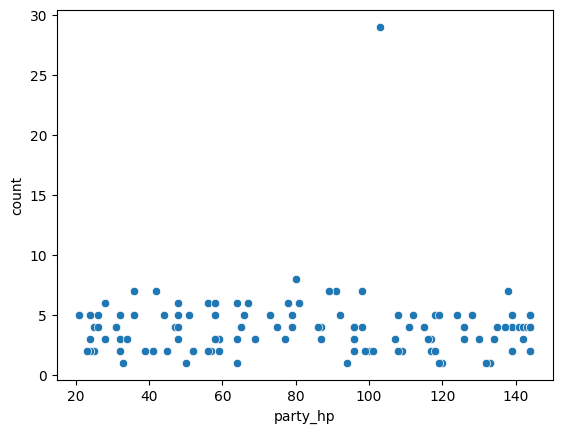

In [ ]:
sns.scatterplot(x = df_messy['party_hp'], y = df_messy['party_hp'].value_counts())

<Axes: xlabel='monster_hp', ylabel='count'>

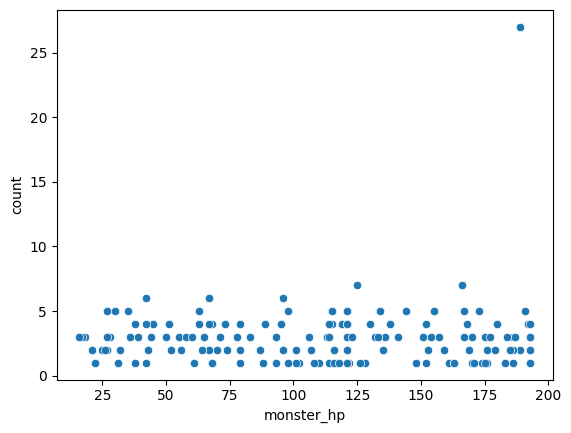

In [ ]:
sns.scatterplot(x = df_messy['monster_hp'],y = df_messy['monster_hp'].value_counts())

In [ ]:
df_messy.head()

,party_level,spellcasters,party_hp,num_monsters,party_attack_bonus,monster_attack_bonus,monster_hp,party_ac,monster_cr,monster_ac,outcome,party_size
0,7.000000,3.0,143.000000,2.0,8.0,7.0,161.0,13.0,9.0,9.0,1,4.0
1,15.000000,3.0,95.943158,3.0,7.0,1.0,67.0,12.0,9.0,21.0,1,6.0
2,11.000000,5.0,82.000000,2.0,7.0,7.0,33.0,10.0,4.0,21.0,1,5.0
3,8.000000,1.0,65.000000,4.0,6.0,3.0,193.0,15.0,3.0,12.0,1,5.0
4,9.606316,1.0,107.000000,4.0,7.0,9.0,39.0,11.0,17.0,16.0,0,3.0


<Axes: xlabel='party_attack_bonus', ylabel='count'>

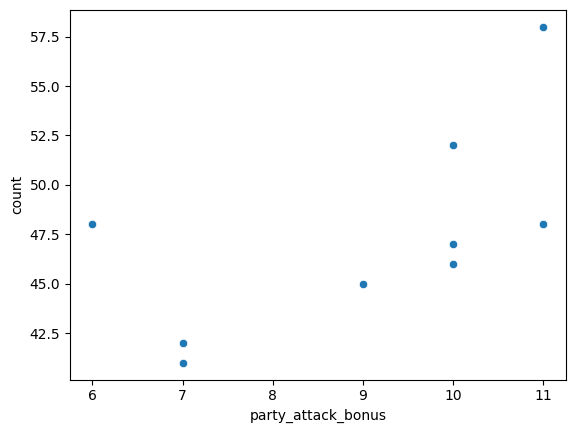

In [ ]:
sns.scatterplot(x = df_messy['party_attack_bonus'], y = df_messy['party_attack_bonus'].value_counts())

In [ ]:
df_messy['outcome'].value_counts()

,count
outcome,
1,334
0,166


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
x = df_messy.drop(columns = ['outcome'], axis = 1)
y = df_messy['outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify= y)

In [ ]:
log = LogisticRegression(max_iter = 1000)
random = RandomForestClassifier(random_state= 42, n_estimators= 100, class_weight= 'balanced')
knn = KNeighborsClassifier()

In [ ]:
log.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
random.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_log = log.predict(x_test)
y_random = random.predict(x_test)
y_knn = knn.predict(x_test)

In [ ]:
print(classification_report(y_test, y_log))
print(classification_report(y_test, y_random))
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.97      0.96      0.96        67

    accuracy                           0.95       100
   macro avg       0.94      0.95      0.94       100
weighted avg       0.95      0.95      0.95       100

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        33
           1       0.87      1.00      0.93        67

    accuracy                           0.90       100
   macro avg       0.94      0.85      0.88       100
weighted avg       0.91      0.90      0.89       100

              precision    recall  f1-score   support

           0       0.70      0.42      0.53        33
           1       0.76      0.91      0.83        67

    accuracy                           0.75       100
   macro avg       0.73      0.67      0.68       100
weighted avg       0.74      0.75      0.73       100



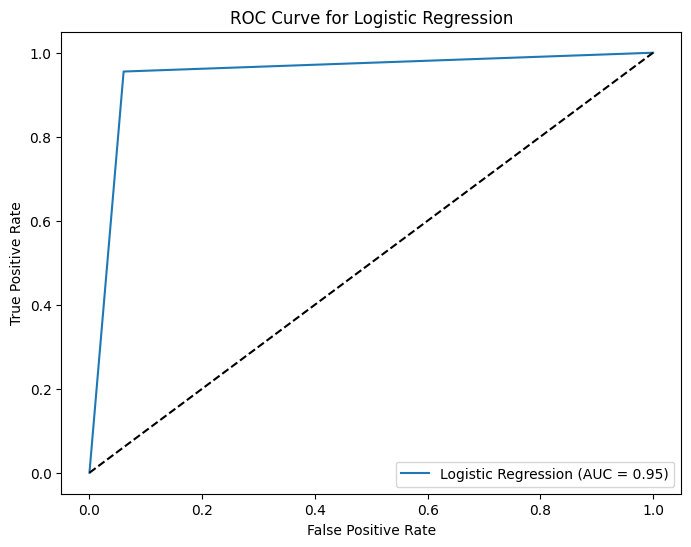

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC for logistic regression
fpr, tpr, thresholds = roc_curve(y_test, y_log)
roc_auc = roc_auc_score(y_test, y_log)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

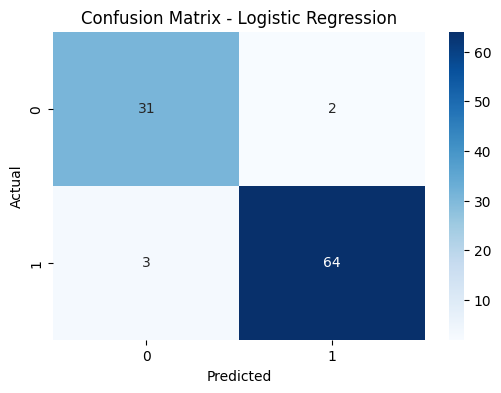

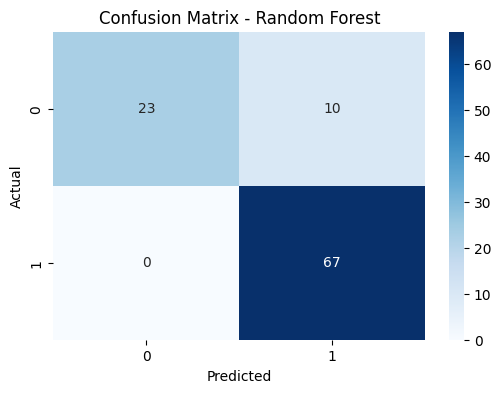

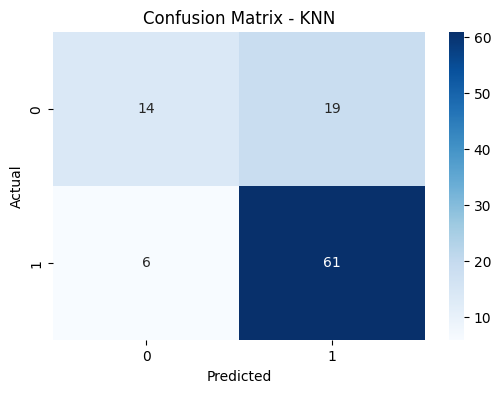

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_log)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Random Forest
cm_random = confusion_matrix(y_test, y_random)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_random, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()